In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import thinkstats2
import thinkplot
import seaborn as sns
import scipy.stats as stats
import scipy.stats
%matplotlib inline
import math
import statsmodels.formula.api as smf
pd.set_option('display.float_format', str)

In [9]:
os.chdir("C:/Users/arun8/Desktop/MS/DSC680/Project2/ThinkStats2-master/ThinkStats2-master/code")
appdata = pd.read_csv("AppleStore.csv")
appdesc = pd.read_csv("appleStore_description.csv")

In [10]:
appdata.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.0,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.0,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [11]:
appdata.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0
mean,4759.069612338474,863130997.4515771,199134453.825066,1.7262178685562626,12892.907183548701,460.3739057940809,3.526955675976101,3.253577879672086,37.36181742392664,3.7071001806308184,5.43490343198555,0.9930526608309017
std,3093.625213150288,271236755.8929177,359206913.5387034,5.833005786952138,75739.40867472359,3920.455183361927,1.5179475936298494,1.8093628231177863,3.7377152388586308,1.9860046449597086,7.919592722881806,0.08306643356297785
min,1.0,281656475.0,589824.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
25%,2090.0,600093661.0,46922752.0,0.0,28.0,1.0,3.5,2.5,37.0,3.0,1.0,1.0
50%,4380.0,978148241.0,97153024.0,0.0,300.0,23.0,4.0,4.0,37.0,5.0,1.0,1.0
75%,7223.0,1082309664.0,181924864.0,1.99,2793.0,140.0,4.5,4.5,38.0,5.0,8.0,1.0
max,11097.0,1188375727.0,4025969664.0,299.99,2974676.0,177050.0,5.0,5.0,47.0,5.0,75.0,1.0


In [12]:
appdesc.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [13]:
appdesc.describe()

,id,size_bytes
count,7197.0,7197.0
mean,863130997.4515771,199134453.825066
std,271236755.8929177,359206913.5387034
min,281656475.0,589824.0
25%,600093661.0,46922752.0
50%,978148241.0,97153024.0
75%,1082309664.0,181924864.0
max,1188375727.0,4025969664.0


In [14]:
data = pd.merge(appdata, appdesc, on='id').drop(['size_bytes_y', 'currency', 'ver', 'ipadSc_urls.num', 'vpp_lic','sup_devices.num'], axis = 1)

In [15]:
data.head()

,Unnamed: 0,id,track_name_x,size_bytes_x,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,lang.num,track_name_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,4+,Games,10,PAC-MAN Premium,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,0.0,161065,26,4.0,3.5,4+,Productivity,23,Evernote - stay organized,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.0,188583,2822,3.5,4.5,4+,Weather,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.0,262241,649,4.0,4.5,12+,Shopping,9,"eBay: Best App to Buy, Sell, Save! Online Shop...",The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,0.0,985920,5320,4.5,5.0,4+,Reference,45,Bible,On more than 250 million devices around the wo...


In [16]:
data = pd.merge(appdata, appdesc, on='id').drop([data.columns[0]], axis = 1)

In [17]:
data.head()

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.0,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.0,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


## App Price Stats

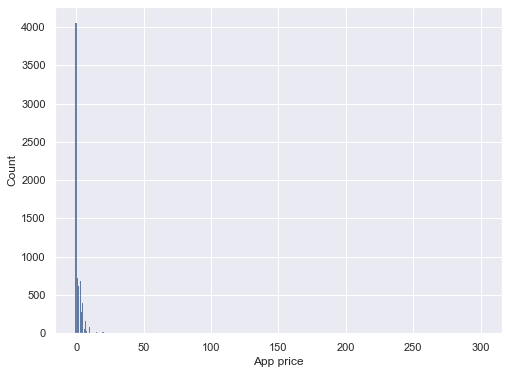

In [122]:
price_hist = thinkstats2.Hist(data.price, label='price')
thinkplot.Hist(price_hist)
thinkplot.Config(xlabel='App price', ylabel='Count')
plt.rcParams["figure.figsize"] = (8,5)

In [20]:
print(price_hist.Largest(5))

[(299.99, 1), (249.99, 1), (99.99, 1), (74.99, 1), (59.99, 3)]


## Total Ratings Stats

In [21]:
rat_count_hist = thinkstats2.Hist(data.rating_count_tot, label='Rating count')
#thinkplot.Hist(rat_count_hist)

In [22]:
print(rat_count_hist.Largest(10))

[(2974676, 1), (2161558, 1), (2130805, 1), (1724546, 1), (1126879, 1), (1061624, 1), (985920, 1), (961794, 1), (878563, 1), (824451, 1)]


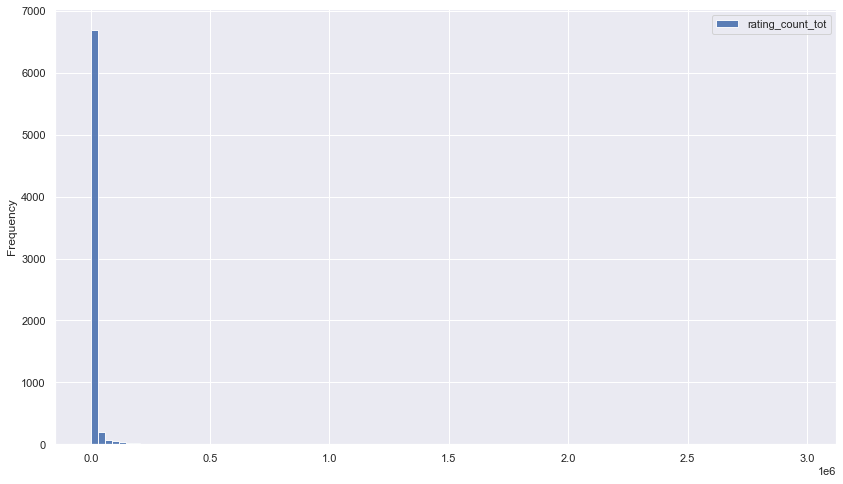

In [117]:
rat_count_hist1 = data.rating_count_tot.plot.hist(bins=100, alpha=0.9, legend=True)
plt.rcParams["figure.figsize"] = (8,6)

## User ratings stats

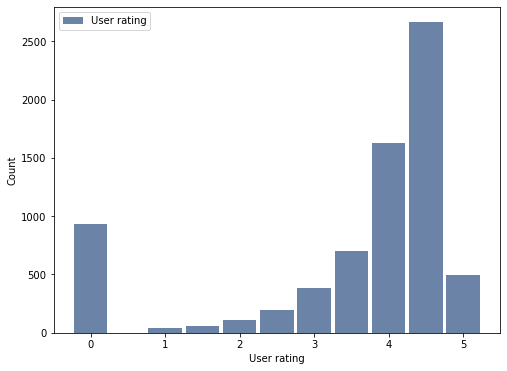

In [24]:
user_rating_hist = thinkstats2.Hist(data.user_rating, label='User rating')
thinkplot.Hist(user_rating_hist)
thinkplot.Config(xlabel='User rating', ylabel='Count')

## App language supported stats

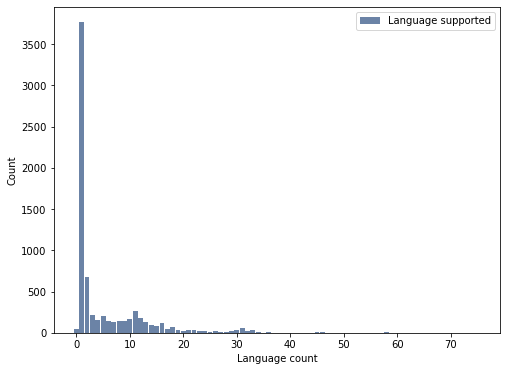

In [25]:
lang_hist = thinkstats2.Hist(data['lang.num'], label='Language supported')
thinkplot.Hist(lang_hist)
thinkplot.Config(xlabel='Language count', ylabel='Count')

In [26]:
print(lang_hist.Largest(5))

[(75, 1), (74, 1), (69, 3), (68, 1), (63, 1)]


In [27]:
print(lang_hist.Smallest(1))

[(0, 41)]


## App size stats

In [28]:
size_hist = thinkstats2.Hist(data['size_bytes_x'], label='App size')
#thinkplot.Hist(size_hist)

In [29]:
print(size_hist.Largest(20))

[(4025969664, 1), (3975609344, 1), (3968637952, 1), (3956326400, 1), (3896109056, 1), (3860406272, 1), (3856588800, 1), (3646993408, 1), (3521220608, 1), (3508826112, 1), (3503480832, 1), (3465451520, 1), (3321082880, 1), (3148421120, 1), (3148132352, 1), (3013255168, 1), (3008276480, 1), (2998989824, 1), (2952593408, 1), (2950687744, 1)]


In [30]:
print(size_hist.Smallest(10))

[(589824, 1), (618496, 1), (671744, 1), (698800, 1), (709632, 1), (746496, 1), (761856, 1), (767126, 1), (880640, 1), (885760, 1)]


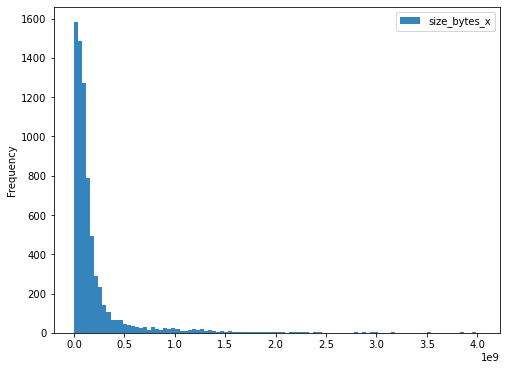

In [31]:
size_hist1 = data.size_bytes_x.plot.hist(bins=100, alpha=0.9, legend=True)
plt.rcParams["figure.figsize"] = (8,6)

## Descriptive Stats

In [32]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [33]:
data.describe()

,id,size_bytes_x,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_bytes_y
count,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000
mean,863130997.45158,199134453.82507,1.72622,12892.90718,460.37391,3.52696,3.25358,37.36182,3.70710,5.43490,0.99305,199134453.82507
std,271236755.89292,359206913.53870,5.83301,75739.40867,3920.45518,1.51795,1.80936,3.73772,1.98600,7.91959,0.08307,359206913.53870
min,281656475.00000,589824.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.00000,0.00000,0.00000,0.00000,589824.00000
25%,600093661.00000,46922752.00000,0.00000,28.00000,1.00000,3.50000,2.50000,37.00000,3.00000,1.00000,1.00000,46922752.00000
50%,978148241.00000,97153024.00000,0.00000,300.00000,23.00000,4.00000,4.00000,37.00000,5.00000,1.00000,1.00000,97153024.00000
75%,1082309664.00000,181924864.00000,1.99000,2793.00000,140.00000,4.50000,4.50000,38.00000,5.00000,8.00000,1.00000,181924864.00000
max,1188375727.00000,4025969664.00000,299.99000,2974676.00000,177050.00000,5.00000,5.00000,47.00000,5.00000,75.00000,1.00000,4025969664.00000


## Removing outliers in app size, rating count, user rating and languages supported

<AxesSubplot:xlabel='size_bytes_x'>

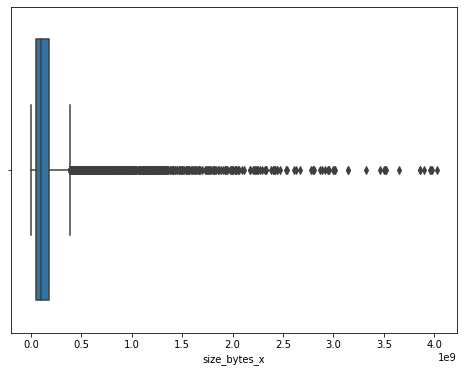

In [34]:
sns.boxplot(x=data.size_bytes_x)

<AxesSubplot:xlabel='rating_count_tot'>

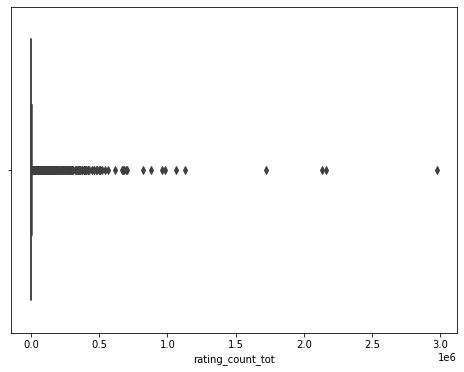

In [35]:
sns.boxplot(x=data.rating_count_tot)

<AxesSubplot:xlabel='rating_count_ver'>

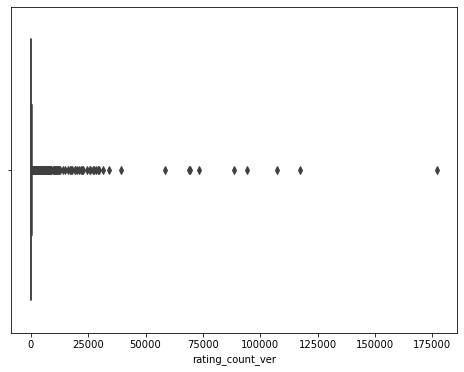

In [36]:
sns.boxplot(x=data.rating_count_ver)

<AxesSubplot:xlabel='lang.num'>

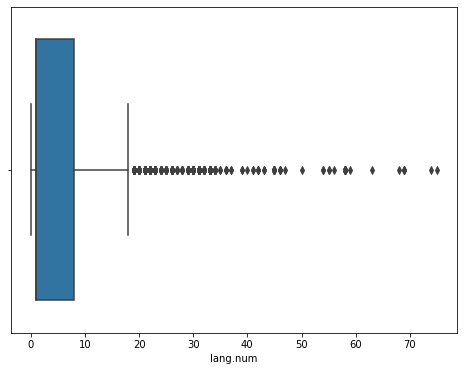

In [37]:
sns.boxplot(x=data['lang.num'])

<AxesSubplot:xlabel='price'>

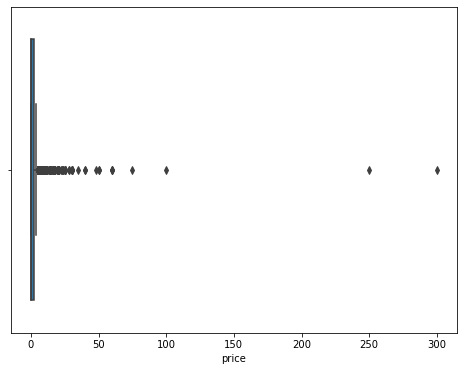

In [38]:
sns.boxplot(x=data.price)

In [39]:
data.describe()

,id,size_bytes_x,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_bytes_y
count,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000
mean,863130997.45158,199134453.82507,1.72622,12892.90718,460.37391,3.52696,3.25358,37.36182,3.70710,5.43490,0.99305,199134453.82507
std,271236755.89292,359206913.53870,5.83301,75739.40867,3920.45518,1.51795,1.80936,3.73772,1.98600,7.91959,0.08307,359206913.53870
min,281656475.00000,589824.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.00000,0.00000,0.00000,0.00000,589824.00000
25%,600093661.00000,46922752.00000,0.00000,28.00000,1.00000,3.50000,2.50000,37.00000,3.00000,1.00000,1.00000,46922752.00000
50%,978148241.00000,97153024.00000,0.00000,300.00000,23.00000,4.00000,4.00000,37.00000,5.00000,1.00000,1.00000,97153024.00000
75%,1082309664.00000,181924864.00000,1.99000,2793.00000,140.00000,4.50000,4.50000,38.00000,5.00000,8.00000,1.00000,181924864.00000
max,1188375727.00000,4025969664.00000,299.99000,2974676.00000,177050.00000,5.00000,5.00000,47.00000,5.00000,75.00000,1.00000,4025969664.00000


In [40]:
data2 = data.copy()

In [41]:
price_mean = data2.loc[data2['price']<20, 'price'].mean()
data2['price'] = np.where(data2['price']>20, price_mean, data2['price'])

In [42]:
lang_median = data2.loc[data2['lang.num']<20, 'lang.num'].median()
data2['lang.num'] = np.where(data2['lang.num']>20, lang_median, data2['lang.num'])

In [43]:
size_median = data2.loc[data2['size_bytes_x']<500000000, 'size_bytes_x'].median()
data2['size_bytes_x'] = np.where(data2['size_bytes_x']>500000000, size_median, data2['size_bytes_x'])

In [44]:
ratingcount_median = data2.loc[data2['rating_count_tot']<50000, 'rating_count_tot'].median()
data2['rating_count_tot'] = np.where(data2['rating_count_tot']>50000, ratingcount_median, data2['rating_count_tot'])

In [45]:
version_ratingcount_median = data2.loc[data2['rating_count_ver']<50000, 'rating_count_ver'].median()
data2['rating_count_ver'] = np.where(data2['rating_count_ver']>50000, version_ratingcount_median, data2['rating_count_ver'])

In [46]:
data2.describe()

,id,size_bytes_x,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_bytes_y
count,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000,7197.00000
mean,863130997.45158,110538220.64652,1.48889,3008.93275,341.74475,3.52696,3.25358,37.36182,3.70710,3.86842,0.99305,199134453.82507
std,271236755.89292,92282805.27107,2.47963,7257.73818,1652.38317,1.51795,1.80936,3.73772,1.98600,4.70202,0.08307,359206913.53870
min,281656475.00000,589824.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.00000,0.00000,0.00000,0.00000,589824.00000
25%,600093661.00000,46922752.00000,0.00000,28.00000,1.00000,3.50000,2.50000,37.00000,3.00000,1.00000,1.00000,46922752.00000
50%,978148241.00000,87666688.00000,0.00000,247.00000,23.00000,4.00000,4.00000,37.00000,5.00000,1.00000,1.00000,97153024.00000
75%,1082309664.00000,141503488.00000,1.99000,1750.00000,139.00000,4.50000,4.50000,38.00000,5.00000,5.00000,1.00000,181924864.00000
max,1188375727.00000,499580928.00000,19.99000,49816.00000,39452.00000,5.00000,5.00000,47.00000,5.00000,20.00000,1.00000,4025969664.00000


### App price after removing outliers

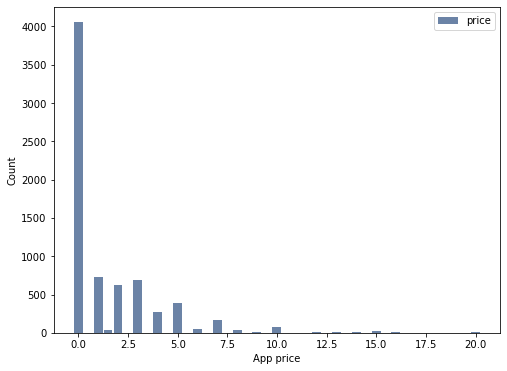

In [47]:
price_hist2 = thinkstats2.Hist(data2.price, label='price')
thinkplot.Hist(price_hist2)
thinkplot.Config(xlabel='App price', ylabel='Count')
plt.rcParams["figure.figsize"] = (12,6)

### App rating count after removing outliers

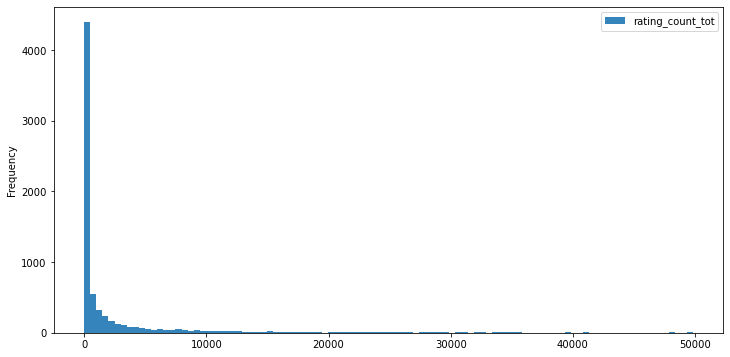

In [48]:
rat_count_hist2 = data2.rating_count_tot.plot.hist(bins=100, alpha=0.9, legend=True)
plt.rcParams["figure.figsize"] = (8,6)

### App user rating count after removing outliers

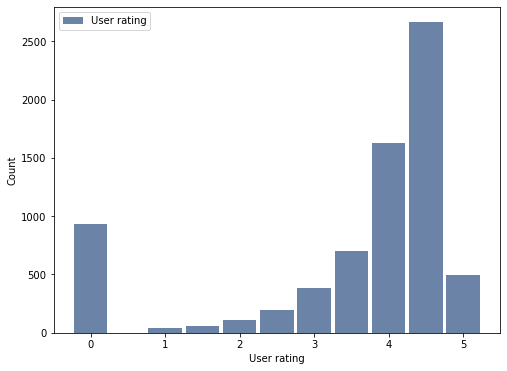

In [49]:
user_rating_hist2 = thinkstats2.Hist(data2.user_rating, label='User rating')
thinkplot.Hist(user_rating_hist2)
thinkplot.Config(xlabel='User rating', ylabel='Count')

### App languages supported after removing outliers

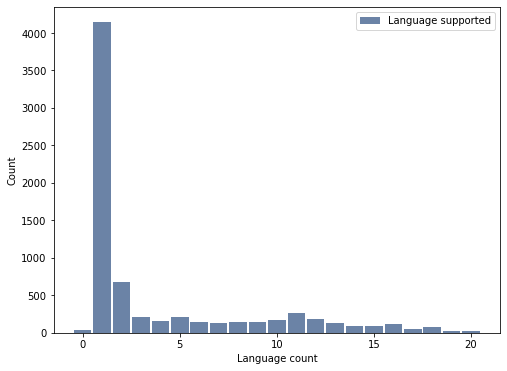

In [50]:
lang_hist2 = thinkstats2.Hist(data2['lang.num'], label='Language supported')
thinkplot.Hist(lang_hist2)
thinkplot.Config(xlabel='Language count', ylabel='Count')

### App size in bytes after removing outliers

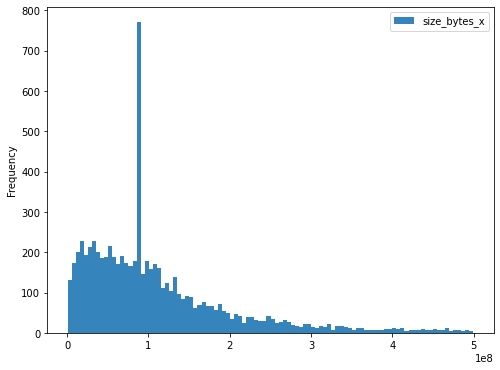

In [51]:
size_hist2 = data2.size_bytes_x.plot.hist(bins=100, alpha=0.9, legend=True)
plt.rcParams["figure.figsize"] = (8,6)

## PMF

### Calculating the user rating PMF for current version of the application with respect to the regular app rating

In [52]:
pmf_normal = thinkstats2.Pmf(data.user_rating)
pmf_version = thinkstats2.Pmf(data.user_rating_ver)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


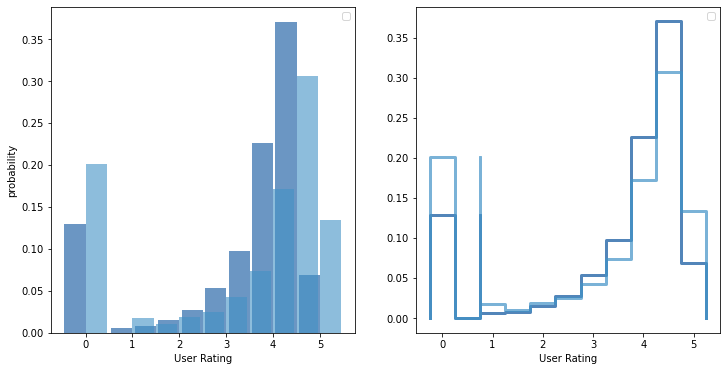

<Figure size 576x432 with 0 Axes>

In [53]:
    width=0.45
    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(pmf_normal, align='right', width=width)
    thinkplot.Hist(pmf_version, align='left', width=width)
    thinkplot.Config(xlabel='User Rating',
                     ylabel='probability',)

    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Pmfs([pmf_normal, pmf_version])
    thinkplot.Show(xlabel='User Rating',)

## CDF

### Calculating the app user rating CDF

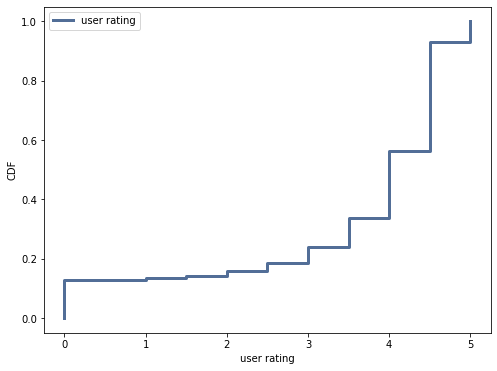

In [54]:
userrating_cdf = thinkstats2.Cdf(data.user_rating, label='user rating')
thinkplot.Cdf(userrating_cdf)
thinkplot.Config(xlabel='user rating', ylabel='CDF')

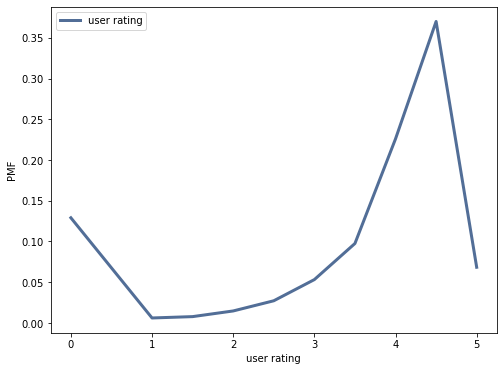

In [55]:
userrating_pmf = thinkstats2.Pmf(data.user_rating, label='user rating')
thinkplot.Cdf(userrating_pmf)
thinkplot.Config(xlabel='user rating', ylabel='PMF')

## Distribution of user rating data

In [56]:
a = data['user_rating'].sort_values()

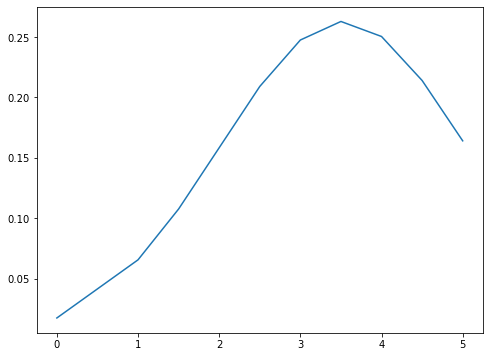

In [57]:
amean = np.mean(a)
astd = np.std(a)
pdf = stats.norm.pdf(a, amean, astd)
plt.plot(a, pdf)

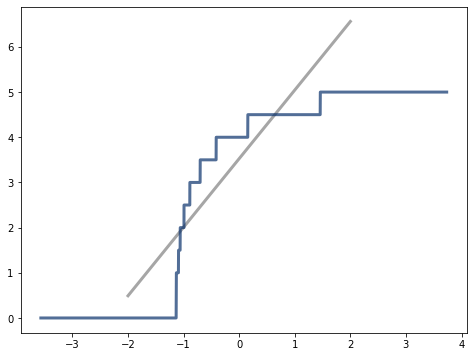

In [58]:
xs, ys = thinkstats2.NormalProbability(a)

def MakeNormalPlot(ratings):
    mean = ratings.mean()
    std = ratings.std()

    xs = [-2, 2]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')

    xs, ys = thinkstats2.NormalProbability(ratings)
    thinkplot.Plot(xs, ys, label='App ratings')

MakeNormalPlot(a)

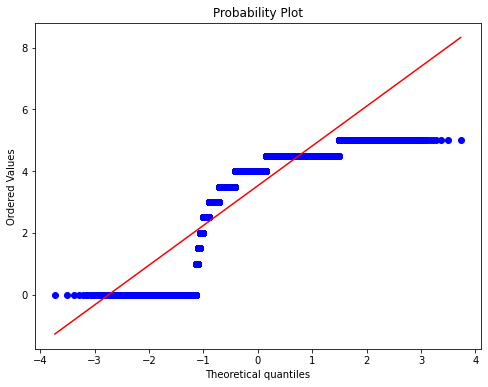

In [59]:
stats.probplot(a, plot=plt)
plt.show()

## Scatter plots

### Price vs Ratings

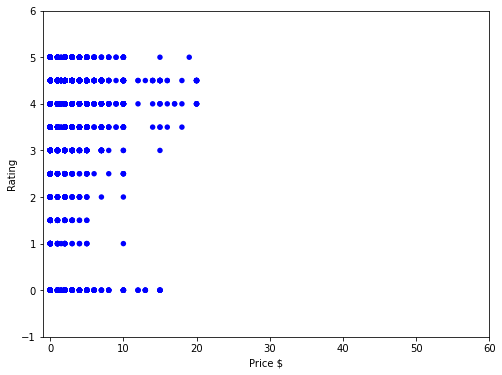

In [60]:
p = data2.price
r = data2.user_rating
thinkplot.Scatter(p,r, alpha=1)
thinkplot.Config(xlabel='Price $',
                 ylabel='Rating',
                 axis=[-1, 60, -1, 6],
                 legend=False)

In [61]:
def Jitter(values, jitter=0.1):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [62]:
p = Jitter(p, 0.1)
r = Jitter(r, 0.1)

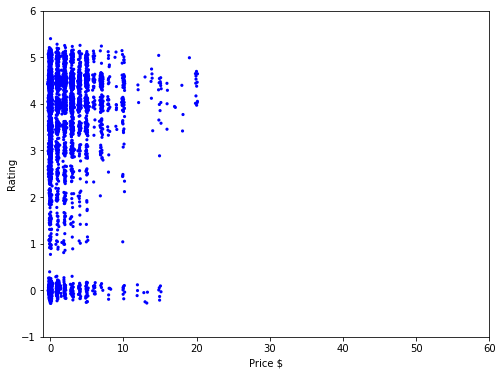

In [63]:
thinkplot.Scatter(p,r, alpha=1.0, s=10)
thinkplot.Config(xlabel='Price $',
                 ylabel='Rating',
                 axis=[-1, 60, -1, 6],
                 legend=False)

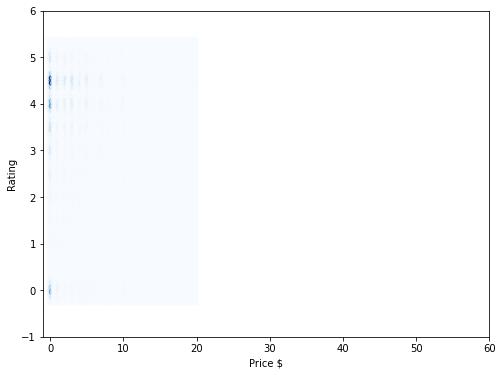

In [64]:
thinkplot.HexBin(p,r)
thinkplot.Config(xlabel='Price $',
                 ylabel='Rating',
                 axis=[-1, 60, -1, 6],
                 legend=False)

### Language vs Ratings

In [65]:
l = data2['lang.num']

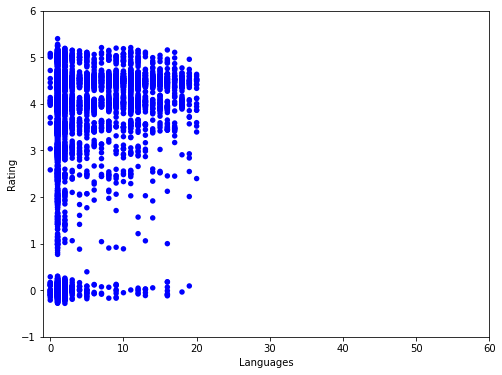

In [66]:
thinkplot.Scatter(l,r, alpha=1)
thinkplot.Config(xlabel='Languages',
                 ylabel='Rating',
                 axis=[-1, 60, -1, 6],
                 legend=False)

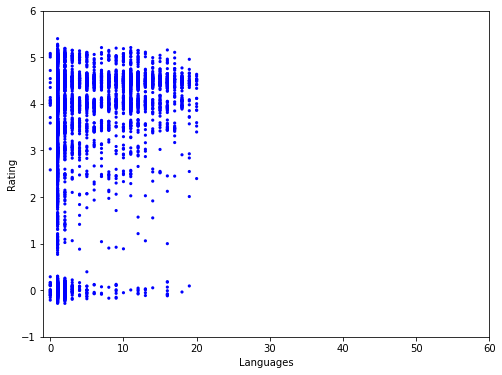

In [67]:
thinkplot.Scatter(l,r, alpha=1.0, s=10)
thinkplot.Config(xlabel='Languages',
                 ylabel='Rating',
                 axis=[-1, 60, -1, 6],
                 legend=False)

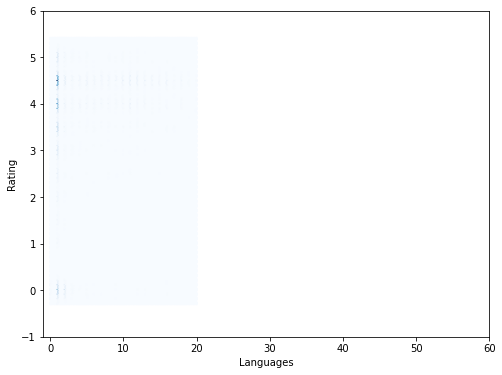

In [68]:
thinkplot.HexBin(l,r)
thinkplot.Config(xlabel='Languages',
                 ylabel='Rating',
                 axis=[-1, 60, -1, 6],
                 legend=False)

## Correlation and Covariance

<AxesSubplot:>

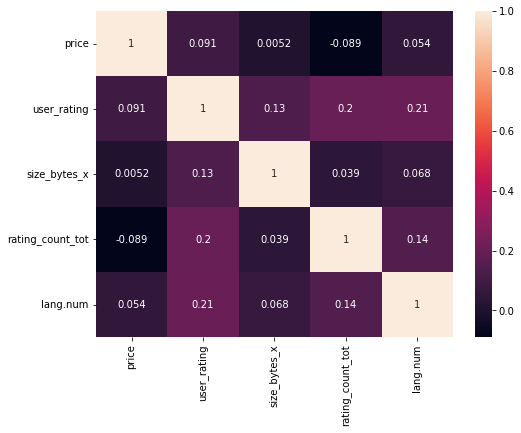

In [69]:
f = (
    data2[['price', 'user_rating', 'size_bytes_x', 'rating_count_tot', 'lang.num']]
).corr()

sns.heatmap(f, annot=True)

<AxesSubplot:>

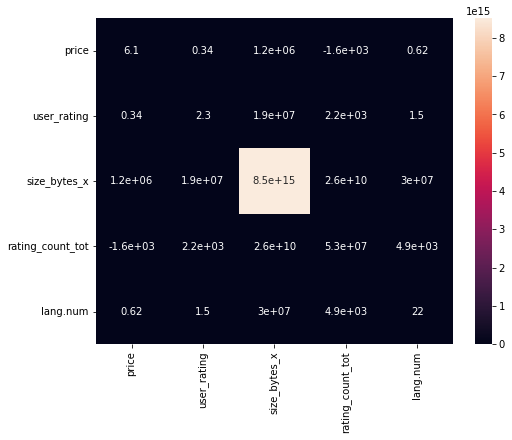

In [70]:
f2 = (
    data2[['price', 'user_rating', 'size_bytes_x', 'rating_count_tot', 'lang.num']]
).cov()
sns.heatmap(f2, annot=True)

## Hypothesis testing

#### Null hypothesis – Current app version user rating count has no impact on total rating count

#### Alternative hypothesis – Current app version rating count has significant impact on total rating count

In [71]:
total_rating_count = data2.rating_count_tot
ver_rating_count = data2.rating_count_ver

In [72]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [73]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [74]:
data_corr1 =  ver_rating_count, total_rating_count
ht = CorrelationPermute(data_corr1)
pvalue = ht.PValue()
pvalue

0.0

#### The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than  1/1000 , but it is not actually 0.

## Regression Models

### Rating vs Price - Simple linear regression

In [75]:
formula = 'data2.user_rating ~ data2.price'
model = smf.ols(formula, data=data2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      data2.user_rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     59.57
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           1.34e-14
Time:                        10:58:20   Log-Likelihood:                -13186.
No. Observations:                7197   AIC:                         2.638e+04
Df Residuals:                    7195   BIC:                         2.639e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.4444      0.021    165.701      0.000       3.404       3.485
data2.price     0.0555      0.007      7.718      0.000       0.041       0.070
==============================================================================
Omnibus:                     1636.505   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2979.636
Skew:                          -1.502   Prob(JB):                         0.00
Kurtosis:                       3.956   Cond. No.                         3.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rating vs languages supported, size of app and price - Multilinear regression

In [76]:
lang = data['lang.num'].values
formula = 'data2.user_rating ~ lang + data2.size_bytes_x + data2.price '
model = smf.ols(formula, data=data2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      data2.user_rating   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     132.2
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           2.30e-83
Time:                        10:58:22   Log-Likelihood:                -13022.
No. Observations:                7197   AIC:                         2.605e+04
Df Residuals:                    7193   BIC:                         2.608e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.0537      0.031     98.569      0.000       2.993       3.114
lang                   0.0314      0.002     14.219      0.000       0.027       0.036
data2.size_bytes_x  1.982e-09   1.89e-10     10.472      0.000    1.61e-09    2.35e-09
data2.price            0.0562      0.007      8.004      0.000       0.042       0.070
==============================================================================
Omnibus:                     1469.209   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2527.602
Skew:                          -1.394   Prob(JB):                         0.00
Kurtosis:                       3.810   Cond. No.                     2.57e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Research Questions

### How many apps are free and paid? Is there a difference in ratings between free vs paid app? 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Free vs. Paid')

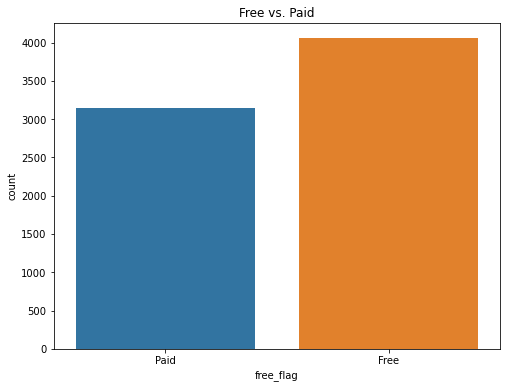

In [77]:
data2['free_flag'] = data2['price'].apply(lambda x: 'Free' if x == 0 else 'Paid')
data2['length_of_app_desc'] = data2['app_desc'].apply(len)

sns.countplot(data2['free_flag']).set_title('Free vs. Paid')

C:\Users\arun8\AppData\Local\Temp\ipykernel_3172\293679672.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data2[data2['price'] != 0][data2['price'] < 10]['price']).set_title('Paid Price Distribution')
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


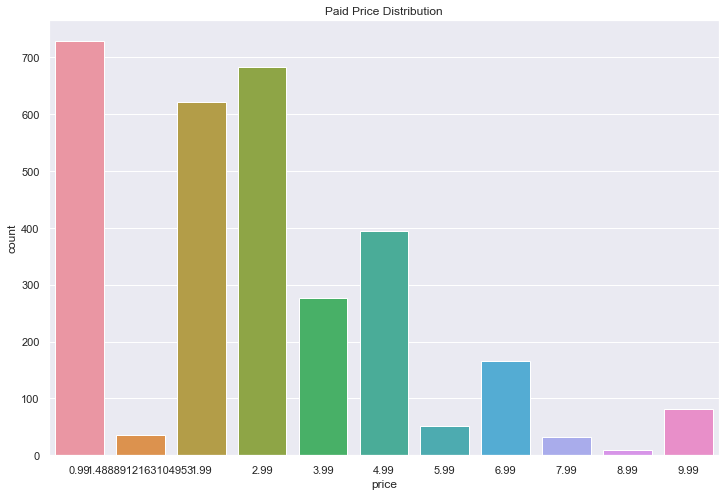

In [83]:
sns.countplot(data2[data2['price'] != 0][data2['price'] < 10]['price']).set_title('Paid Price Distribution')
plt.rcParams["figure.figsize"] = (25,6)

#### As per linear regression, there is no significant difference between the app price and rating

### Find distribution of apps based on content category, Which genre has the highest number of apps?

In [79]:
data3 = data.copy()
data3['total_review_rank'] = (data3['rating_count_tot'] + (data3['rating_count_tot'] + 3000) * data3['user_rating_ver'] + (3000 + (data3['rating_count_ver'] + 3000)) * data3['user_rating_ver'].mean())

<AxesSubplot:title={'center':'Median Review Ranking Per Genre'}, ylabel='prime_genre'>

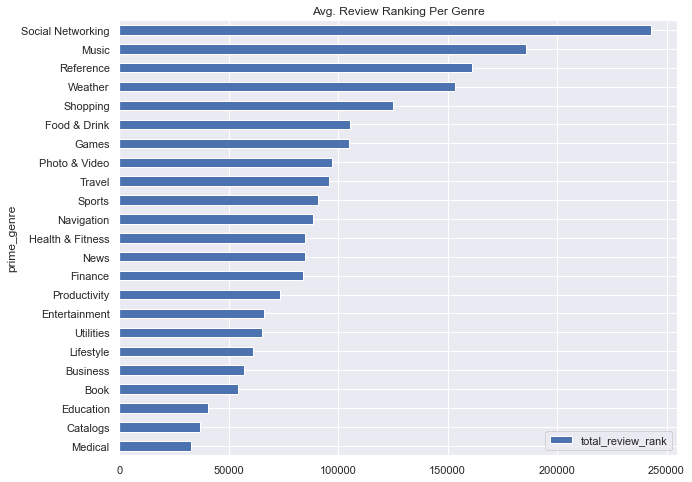

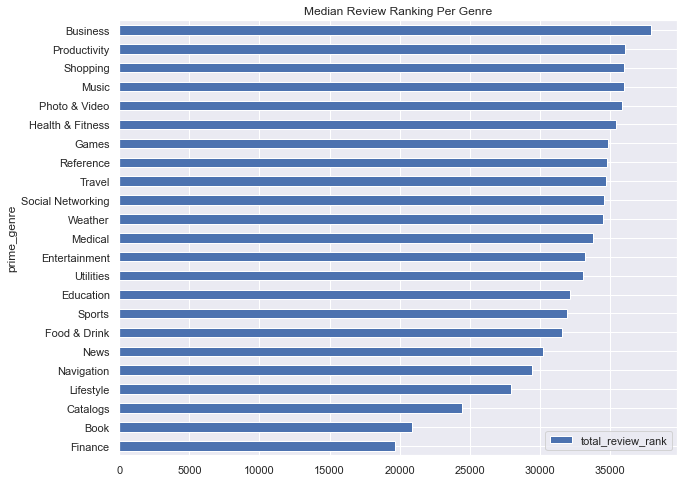

In [80]:
sns.set(font_scale=1)

data3[['prime_genre', 'total_review_rank']].groupby('prime_genre').mean().sort_values(by="total_review_rank").plot(kind='barh', title='Avg. Review Ranking Per Genre', figsize=(10,8))

data3[['prime_genre', 'total_review_rank']].groupby('prime_genre').median().sort_values(by="total_review_rank").plot(kind='barh', title='Median Review Ranking Per Genre', figsize=(10,8))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


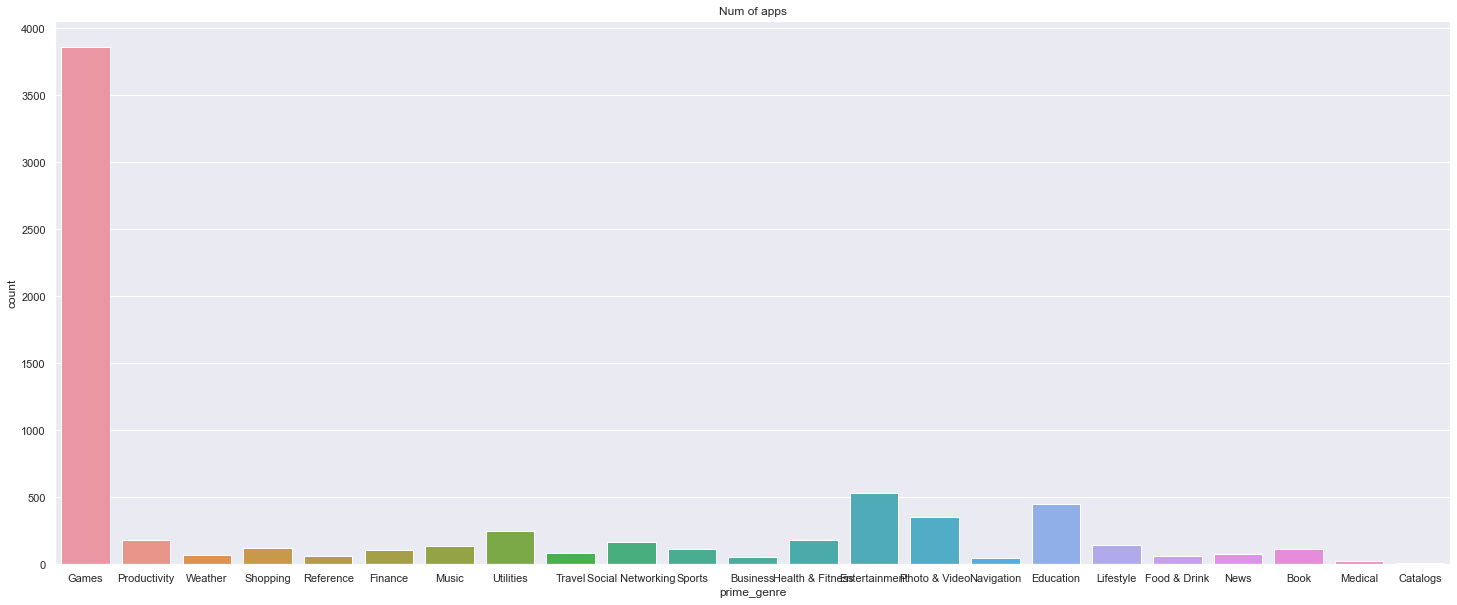

In [95]:
sns.countplot(data3['prime_genre']).set_title('Num of apps')
plt.rcParams["figure.figsize"] = (25,3)

### Does size and language supported of app has any impact on its ratings? 


#### There is no significant impact of languages supported and size of app with respect to ratings, the low R squared value from the linear regression proves that.